<a href="https://colab.research.google.com/github/Scrabby1/ADA-Informes/blob/main/Informe_Bellman_Ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Descripción del problema

**Entrada:** Un grafo G=(V,E),un vértice fuente s que pertenece a V y un valor l que se le asocia a cada arco que pertenece a E

**Salida:** Uno de los dos casos:

**i.**La distancia mas corta dist(s,v) para cada vértice v perteneciente a V

**ii.**Una declaración de que G contiene un ciclo negativo.

Cuando hacemos un algoritmo para encontrar una solución, siempre se quiere encontrar la solución más eficiente de todas, este tipo de problema se llaman problemas de optimización, en este informe se vera la solución para encontrar el camino mas corto desde un nodo fuente s, para lograr esto se van utilizar los algoritmos dijkstra y Bellman-Ford.

El problema de este ejercicio va a ser el tamaño de la entrada, en este caso van a ser la cantidad de arcos y vértices

#2.Algoritmos

**Generador de instancias**

In [22]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

**Generador de instancia para dijkstra**

In [23]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def DijkstraInstance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return DijkstraInstance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(1, 100)) # 1 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(1, 100)) # 1 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return DijkstraInstance_generator(n)

    return graph, graph[0][0]

In [24]:
import networkx as nx


def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

**Bellman-Ford**

In [29]:
import matplotlib.pyplot as plt
 
def BellmanFord(graph, V, E, s,visualize=False,verbose=False,experimento=False):

    if(verbose==True):
      print("Se reciben los siguientes datos:")
      print("nodo fuente:",s)
      print("cantidad de vertices:",V)
      print("cantidad de arcos:",E)
      print("grafo:",graph)
      print("-------------------------------------------------")
      print("Se crea el arreglo que guardara la distancia")
      print("-------------------------------------------------")
    dis = [99999999999] * V
 
    dis[s] = 0
    if(verbose==True):
      print("Se empiezan a recorrer los arcos y vertices")
    for i in range(V - 1):
        for j in range(E):
            if(verbose==True):
              print("Se comprueba el camino mas corto hacia el nodo v")
              print("camino mas corto con i arcos + el peso del camino",dis[graph[j][0]] + graph[j][2],"Camino corto actual",dis[graph[j][1]])
            if (dis[graph[j][0]] + graph[j][2] < dis[graph[j][1]]):
                if(verbose==True):
                  print("El camino es mas corto,se debe actualizar")
                dis[graph[j][1]] = dis[graph[j][0]] + graph[j][2]

    if(verbose==True):
      print("-------------------------------------------------")
      print("Se comprobara que no hayan ciclos negativos")
 
    for i in range(E):
        x = graph[i][0]
        y = graph[i][1]
        weight = graph[i][2]
        if (dis[x] != 99999999999 and dis[x] + weight < dis[y]):
            print("El grafo posee un ciclo negativo")

    if(verbose==True):
      print("El grafo no posee ciclos negativos")
      print("-------------------------------------------------")
    
    if(experimento==True):
      print("Camino mas corto desde la fuente")
      for i in range(V):
        print("Desde el nodo:",i,"---->",dis[i])
    
    if(visualize==True):
      grafo=graph_to_nxdigraph(graph,V)
      pos=nx.spring_layout(grafo)
      labels = nx.get_edge_attributes(grafo,'weight')
      nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels,font_size=14)
      nx.draw(grafo,pos, node_color="red", with_labels=True, node_size=500, font_color="white", font_size=14, font_weight="black", width  =0.5, edge_color ="green")

g,a=instance_generator(5)
BellmanFord(g, 5, len(g), 0,False,False,True)

Camino mas corto desde la fuente
Desde el nodo: 0 ----> 0
Desde el nodo: 1 ----> 14
Desde el nodo: 2 ----> 106
Desde el nodo: 3 ----> 24
Desde el nodo: 4 ----> 96


**Dijsktra**

In [27]:
import sys

def listT_to_matrix(graph, V):
    edges = len(graph)
    newGraph = [[0 for i in range(V)] for j in range(V)]

    for node in range(edges):
        for (x, y, peso) in graph:
            newGraph[x][y] = peso

    return newGraph


def minDistance(V, dist, visited,verbose=False):
    min = sys.maxsize
    min_index = 0
    
    if(verbose==True):
      print("Se recorren los nodos en busca de la distancia minima")
    for u in range(V):
        if dist[u] < min and visited[u] == False:
            min = dist[u]
            min_index = u
    
    return min_index

def Dijkstra(graph, V ,s,verbose=False,experimento=False):
    if(verbose==True):
      print("Se reciben los siguientes datos:")
      print("Grafo:",graph)
      print("Cantidad de vertices:",V)
      print("Nodo fuente:",s)
      print("-------------------------------------------------")
      print("Se crea el arreglo que guardara la distancia")
      print("Se crea un arreglo para marcar los nodos como visitados")
      print("-------------------------------------------------")
    dist = [sys.maxsize] * V
    dist[s] = 0
    sptSet = [False] * V

    if(verbose==True):
      print("Se recorre los nodos del grafo")
 
    for cout in range(V):
        
        if(verbose==True):
          print("Se busca la distancia minima")
        x = minDistance(V, dist, sptSet,verbose)
 
        sptSet[x] = True
        if(verbose==True):
          print("Se marca el nodo como visitado")
          print("-------------------------------------------------")

        for y in range(V):
            if(verbose==True):
              print("Se comprueba el camino mas corto hacia el nodo v")
              print("comparacion entre la distancia ",dist[y],"y la distancia",dist[x]+graph[x][y])
            if graph[x][y] > 0 and sptSet[y] == False and dist[y] > dist[x] + graph[x][y]:
              dist[y] = dist[x] + graph[x][y]
              if(verbose==True):
                print("se actualiza la distancia")
    if(verbose==True):
      print("-------------------------------------------------")
    if(experimento==True):
      print("Camino mas corto desde la fuente")
      for i in range(V):
        print("Desde el nodo:",i,"---->",dist[i])  

g,a=DijkstraInstance_generator(5)
g2=listT_to_matrix(g, 5)
Dijkstra(g2,len(g2), 0,False,True)

Camino mas corto desde la fuente
Desde el nodo: 0 ----> 0
Desde el nodo: 1 ----> 51
Desde el nodo: 2 ----> 111
Desde el nodo: 3 ----> 38
Desde el nodo: 4 ----> 13


##2.1.Descripción de los algoritmos

###2.1.1.Subestructura optima y función de recurrencia

Antes de empezar a describir ambos códigos se debe explicar la subestructura optima que utilizan ambos y la función de recurrencia que se genera por esta

**Subestructura optima**

Vamos a definir la cantidad de arcos de la ruta optima **P** para llegar a **s** hasta **v** como **i** **(s es el nodo fuente y v es el último nodo que se llega)**. La ruta más corta **P** se puede obtener calculando otras rutas **P’** entre **s** y un nodo intermedio **w**, limitado a **i-1** arcos. Luego se sumaría la distancia entre **w y V** 

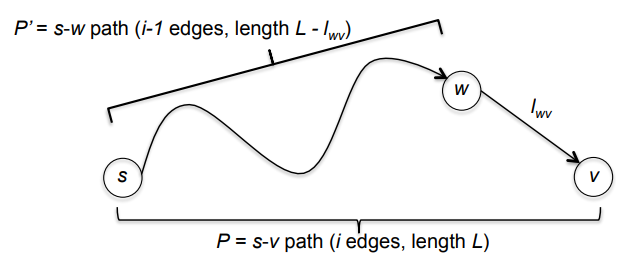

Si no se conoce la cantidad de arcos se aplica el siguiente lema:

Se considera **G = (V,E)** un grafo dirigido con arcos con largos asignados y un nodo fuente **s ∈ V**. Suponiendo que **i >= 1** y **v ∈ V** y también que **P** sea la ruta más corta desde **s hasta v** en **G** con i arcos o menos. Por lo tanto se tendrán una de las dos opciones

**P** es la ruta más corta con **i-1** arcos o menos

**P** es para algún valor **w ∈ V**,la ruta más corta desde **s** hasta **w** con **i-1** arcos o menos, más la adición del arco **(w,v) ∈ E**.

**Función de recurrencia**

Una vez establecida la subestructura optima del algoritmo, se puede explicar la función de recurrencia de estos algoritmos

Sea **$L_{i,v}$** el largo mínimo de un camino **s** hasta **v** con hasta **i-1** arcos. Luego para cada **i>=1** y **v ∈ V** se tendrá:

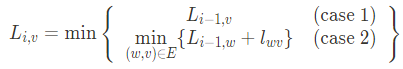

Los subproblemas de base serian, para todo **v ∈ V**:


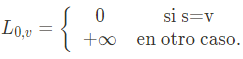

###2.1.2.Algoritmo Bellman-Ford

Este algoritmo utiliza programación dinámica de forma bottom up para realizar su procedimiento, encontrar el camino más corto

Como entrada este algoritmo va a tener el nodo fuente **s** y el grafo **graph** y la cantidad de nodos y arcos **(V y E)**

Primero este algoritmo crea un arreglo llamado **dist** donde se van a guardar las distintas distancias entre nodos y se inician todas las distancias en infinito y la fuente en 0

Después se relajan los arcos **V-1** veces (**V** siendo la cantidad total de nodos),mientras se va haciendo eso en un ciclo iterativo, se van actualizando los valores de **dist** dependiendo de los caminos con menor peso encontrados

Por último se comprueba que no haya un ciclo negativo, esto ocurre cuando la distancia actual termina con un valor negativo, cuando esto ocurre se envía un mensaje de que existe un ciclo negativo

Como salida vamos a tener la distancia más corta del nodo fuente o un mensaje indicando que existe un ciclo negativo

###2.1.3.Algoritmo Dijsktra

Este algoritmo funciona similar al algoritmo Bellman-Ford, recibe la misma entrada, el grafo **graph** y un nodo fuente **s**

Primero crea dos arreglos **dist** para guardar las distancias calculadas de cada nodo y **sptSet** coloca todos los nodos como no visitados **False**

En cada iteración del primer for se busca la distancia mínima de todos los nodos que no se procesaron aun con la función minDistance, esta función se encarga de agregar un nodo a la distancia minima actual encontrada, esta función busca entre los nodos adyacentes al que estamos y vemos cuál de ellos da un menor valor para la distancia mínima

Una vez encontrada esa distancia mínima se marca true en ese nodo y se actualizan todas las distancias alrededor para ir guardando las distancias calculadas y ver si en futuro alguna nos puede dar un mejor resultado  

Al terminar de iterar este algoritmo retorna la distancia mínima encontrada del nodo fuente, notar que este algoritmo no funcionara si se encuentra un ciclo negativo en el grafo.

Como salida vamos a tener las distancias mínimas hacia cada nodo cumpliendo el camino más corto desde el nodo fuente.

##2.2.Ejemplos

###2.2.1.Algoritmo Bellman-Ford

Tengamos el siguiente grafo

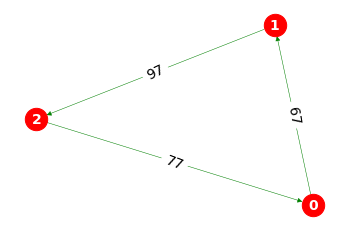

El nodo fuente sera el 0, la cantidad de vertices y arcos son 3

Primero se crea el arreglo distancia y se colocan todos los nodos en infinito, excepto la fuente, el cual queda en distancia 0

Luego se mueve al nodo 1, se suma la distancia y el valor de su distancia ahora va a ser 67

Despues nos movemos al nodo 2, se aplica la suma y actualizamos su distancia con 164

Por ultimo llegamos al nodo 0 de nuevo, se suma la distancia y actualizamos su distancia como 241

Ahora que tenemos la mínima distancia,se debe comprobar que no haya un ciclo negativo, como el resultado de la distancia no da negativo, entonces no posee un ciclo negativo

Y se muestran los resultados de las distancias mínimas

###2.2.2.Algoritmo Dijsktra

Tomemos el siguiente grafo

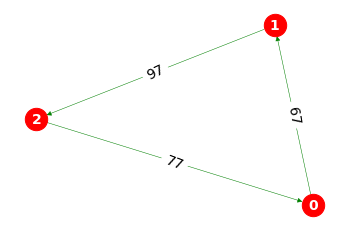

El nodo fuente será el 0, la cantidad de vertices y arcos son 3

Primero se crea el arreglo distancia y se colocan todos los nodos en infinito, excepto la fuente, el cual queda en distancia 0

También se crea un arreglo para marcar los nodos que han sido visitados

Se busca la mínima distancia de los nodos que aún no han sido visitados,como ningún nodo es visitado y el unico nodo adyascente a 0 es 1,por lo que se marcara como visitado el 1 y se sumara la distancia a 1,quedando 67

Después se realiza el mismo paso para el nodo uno y se encuentra el 2, se suma la distancia que quedara 164 y se marca el nodo 2 como visitado

Por último se vuelve a repetir este proceso y se encuentra la distancia mínima hacia el nodo 0, siendo 241 y se marca como visitado

Se muestran los resultados de las distancias minimas

##2.3.Ejecución paso a paso con verbose

###2.3.1.Algoritmo Bellman-Ford

In [30]:
g,a=instance_generator(3)
BellmanFord(g, 3, len(g), 0,False,True,True)

Se reciben los siguientes datos:
nodo fuente: 0
cantidad de vertices: 3
cantidad de arcos: 4
grafo: [(1, 2, 32), (2, 0, 53), (0, 1, 66), (0, 1, 46)]
-------------------------------------------------
Se crea el arreglo que guardara la distancia
-------------------------------------------------
Se empiezan a recorrer los arcos y vertices
Se comprueba el camino mas corto hacia el nodo v
camino mas corto con i arcos + el peso del camino 100000000031 Camino corto actual 99999999999
Se comprueba el camino mas corto hacia el nodo v
camino mas corto con i arcos + el peso del camino 100000000052 Camino corto actual 0
Se comprueba el camino mas corto hacia el nodo v
camino mas corto con i arcos + el peso del camino 66 Camino corto actual 99999999999
El camino es mas corto,se debe actualizar
Se comprueba el camino mas corto hacia el nodo v
camino mas corto con i arcos + el peso del camino 46 Camino corto actual 66
El camino es mas corto,se debe actualizar
Se comprueba el camino mas corto hacia el

###2.3.2.Algoritmo Dijsktra

In [28]:
g,a=DijkstraInstance_generator(3)
g2=listT_to_matrix(g, 3)
Dijkstra(g2,len(g2), 0,True,True)

Se reciben los siguientes datos:
Grafo: [[0, 0, 74], [64, 0, 0], [0, 72, 0]]
Cantidad de vertices: 3
Nodo fuente: 0
-------------------------------------------------
Se crea el arreglo que guardara la distancia
Se crea un arreglo para marcar los nodos como visitados
-------------------------------------------------
Se recorre los nodos del grafo
Se busca la distancia minima
Se recorren los nodos en busca de la distancia minima
Se marca el nodo como visitado
-------------------------------------------------
Se comprueba el camino mas corto hacia el nodo v
comparacion entre la distancia  0 y la distancia 0
Se comprueba el camino mas corto hacia el nodo v
comparacion entre la distancia  9223372036854775807 y la distancia 0
Se comprueba el camino mas corto hacia el nodo v
comparacion entre la distancia  9223372036854775807 y la distancia 74
se actualiza la distancia
Se busca la distancia minima
Se recorren los nodos en busca de la distancia minima
Se marca el nodo como visitado
-----------

##2.4.Ejecución con visualize

Camino mas corto desde la fuente
Desde el nodo: 0 ----> 0
Desde el nodo: 1 ----> 155
Desde el nodo: 2 ----> 84


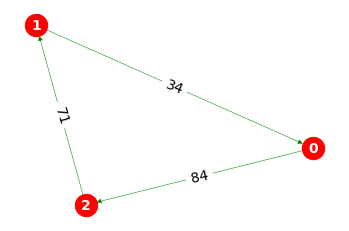

In [31]:
g,a=instance_generator(3)
BellmanFord(g, 3, len(g), 0,True,False,True)

#3.Correctitud

**Teorema (correctitud)**

El algoritmo Bellman Ford recibe un algoritmo grafo, su cantidad de nodos, cantidad de arcos y un nodo fuente que pertenece al mismo grafo. Retorna la distancia mínima desde el nodo fuente

**Prueba del teorema**

Para probar teorema se utilizara inducción matemática y se va a utilizar la siguiente hipotesís:

Durante la i-ésima iteración, la distancia **s** a cada nodo **v** separado por una distancia máxima permitida de **i** arcos va a ser igual a distancia más corta

**Caso base**

Cuando el grafo posee solo un nodo su distancia máxima va a ser 0 debido ya que esta es la distancia máxima hacia si mismo

**Caso inductivo**

Al comienzo de la iteración **i+1**,la distancia del camino más corto desde **s** hasta **v** contiene un máximo de **i** arcos. Pero cuando se agrega un arco adicional se debe considerar la posibilidad de que existe un nuevo camino que minimice la distancia, pueden haber dos casos:

El camino más corto desde **s** a **v** tiene **i** arcos o menos, esto implica que ningún camino de **s** hasta **v** formado por **i+1** arcos minimizara la distancia, esto nos va a dejar con la iteración anterior.

El camino más corto desde **s** a **v** tiene **i+1** arcos. Consideremos a **w** un nodo predecesor a **v**, el camino de **s** a **w** está formado por **i** arcos. Se sabe por inducción que la distancia al nodo **w** es óptima, después, al sumar la distancia de **(w,v)**, se va obtener la distancia de **s** a **v**, como en esta iteración se recorrerán los arcos que llegan hasta **v** se sabrá que uno de estos será el que minimice **s** a **v** 

Como es correcto en el caso inductivo y el base, se prueba que el algoritmo es correcto.

#4.Tiempo de ejecución

##4.1.Algoritmo Bellman-Ford

**Teorema**

El algoritmo Bellman-Ford tiene un tiempo de ejecución de O(VE) 

**Prueba del teorema**

Se puede probar el teorema revisando los procesos realizados por este algoritmo.

Primero se inician las distancias de cada nodo, esto tiene complejidad **O(V)**

Luego para encontrar el camino desde **s** hasta cualquier nodo eso tiene complejidad **O(VE)**

Después, verificar que no hayan ciclos negativos tiene complejidad **O(E)**

La mayor complejidad de estas es **O(VE)** por lo que esta complejidad es el tiempo de ejecución del algoritmo

##4.2.Algoritmo Dijsktra

**Teorema**

El tiempo de ejecución de este algoritmo tiene complejidad **O(V∧2)**
 

**Prueba del teorema**

Se puede probar el teorema revisando los procesos que realiza el algoritmo

La complejidad de visitar todos los nodos tiene complejidad **O(V)**

Procesar un nodo tiene complejidad **O(V)**

Ahora procesar todos los nodos y visitarlos todos eso tiene complejidad **O(V∧2)**

Por lo tanto esta es la complejidad temporal del algoritmo, cabe destacar que esta complejidad se puede reducir a **O((V+E)logV)**

#5.Experimentos

A continuación se presentaran los resultados de los experimentos realizados

##5.1.Comparación de tiempo practico con el teorico

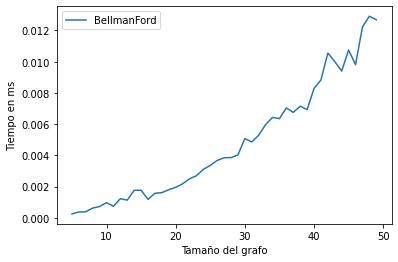

In [35]:
import math
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[];
y=[];

for n in range(5,50):
  g,a=instance_generator(n)
  t = repeat(setup="from __main__ import BellmanFord", stmt=f"BellmanFord({g},{n}, {len(g)},{0})", repeat=1, number=10)
  x.append(n)
  y.append(t)

plt.plot(x,y)
plt.legend(["BellmanFord"])
plt.xlabel('Tamaño del grafo')
plt.ylabel('Tiempo en ms')
plt.show()

**Análisis de resultados**

Como se puede apreciar en la imagen se ven en forma exponencial, esta manera es similar a la forma ya explicada anteriormente la cual es **O(VE)** ya que generalmente la cantidad de arcos y vértices son lo mismo, que es lo mismo que **v*v** siendo esta una forma exponencial, por lo que los resultados practicos son similares a los teoricos.

##5.2.Algoritmo Bellman-Ford vs algoritmo Dijsktra

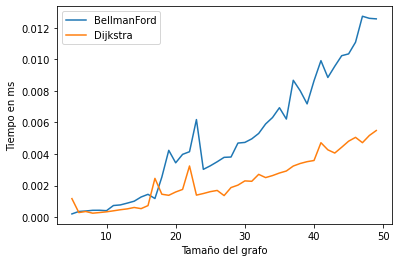

In [32]:
import math
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[];
y=[];
z=[];
for n in range(5,50):
  g,a=instance_generator(n)
  g2,a=DijkstraInstance_generator(n)
  g3=listT_to_matrix(g2, n)
  t = repeat(setup="from __main__ import BellmanFord", stmt=f"BellmanFord({g},{n}, {len(g)},{0})", repeat=1, number=10)
  k = repeat(setup="from __main__ import Dijkstra", stmt=f"Dijkstra({g3},{len(g3)}, {0})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  z.append(k)
plt.plot(x,y)
plt.plot(x,z)

plt.legend(["BellmanFord","Dijkstra"])
plt.xlabel('Tamaño del grafo')
plt.ylabel('Tiempo en ms')
plt.show()

**Análisis de los resultados**

Como se puede apreciar los resultados, se puede apreciar que el algoritmo BellmanFord se coloca encima del dijkstra, esto se debe a que el tiempo de ejecución del Bellman posee una complejidad **O(VE)** y **O(V∧2)**, siendo la de **O(VE)** una complejidad menor ya que no siempre la cantidad de arcos y vertices son la misma.